### Pre-Lab Warm-Up Exercise

What is the expression for $y(t)$, the height of the object at some later time $t$?

$y(t) = y_0 + v_{0y}t - \frac{1}{2}gt^2$

Initial Height: $5m$

$at^2 + bt + c = 5 - gt^2$

$a = g$

$b = 0$

$c = 5$

Initial Velocity = $0.23$

Acceleration = $-5.09$

### Analysing the Data

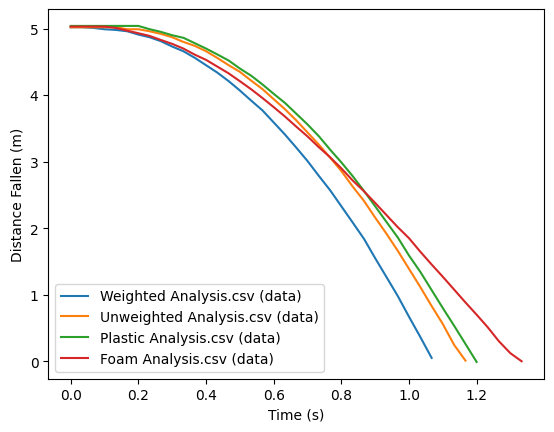

In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def process_and_plot_csv(file_name, time_column, position_column, skip_rows=1):
    with open(file_name) as file:
        reader = csv.reader(file)
        for _ in range(skip_rows):
            next(reader)

        Time = []
        Position = []
        for row in reader:
            Position.append(row[position_column])       
            Time.append(row[time_column])

    Position = [float(i) for i in Position]
    Time = [float(i) for i in Time]


    Time_Physical = [t - Time[0] for t in Time]


    plt.plot(Time_Physical, Position, "-", label=f"{file_name} (data)")


csv_files = ['Weighted Analysis.csv', 'Unweighted Analysis.csv', 'Plastic Analysis.csv', 'Foam Analysis.csv']


time_column_index = 0
position_column_index = 1

for csv_file in csv_files:
    process_and_plot_csv(csv_file, time_column_index, position_column_index)



plt.xlabel('Time (s)')
plt.ylabel('Distance Fallen (m)')
plt.legend()
plt.show()


### Interpretation, Sources of Error, and Conclusions

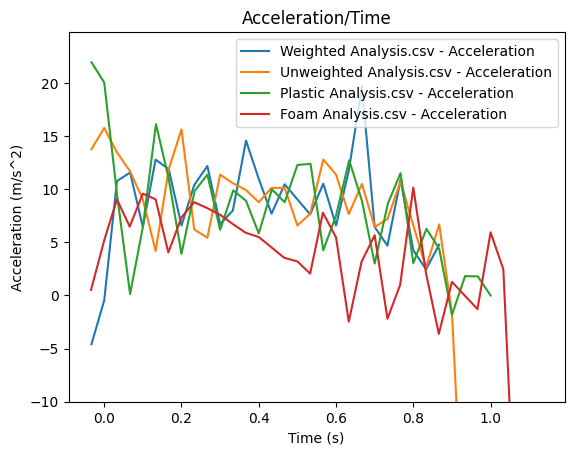

Average Acceleration for Weighted Analysis.csv: 8.384631134478449 m/s^2
Average Acceleration for Unweighted Analysis.csv: 6.543620102772443 m/s^2
Average Acceleration for Plastic Analysis.csv: 8.014082024411637 m/s^2
Average Acceleration for Foam Analysis.csv: 1.7225477366904451 m/s^2


In [7]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def analyze_csv(file_name):
    with open(file_name) as file:
        reader = csv.reader(file)
        Time = []
        Position = []
        for row in reader:
            Position.append(row[1])       
            Time.append(row[0])

    Time = Time[6:]
    Position = Position[6:]

    Position = [float(i) for i in Position]

    # Convert position data to distance fallen
    initial_position = Position[0]
    Distance_fallen = [initial_position - float(pos) for pos in Position]

    Time_Physical = [float(i) - float(Time[1]) for i in Time]

    # Getting terminal velocity
    Velocity = np.gradient(Distance_fallen, Time_Physical)

    # Find acceleration to find at what point acceleration flattens out
    Acceleration = np.gradient(Velocity, Time_Physical)

    # Terminal velocity interval
    Terminal_Velocity_Interval = slice(0, None)
    
    # Avg terminal velocity
    Average_Terminal_Velocity = np.mean(Velocity[Terminal_Velocity_Interval])

    return Time_Physical, Distance_fallen, Velocity, Acceleration

# List of CSV files
csv_files = ['Weighted Analysis.csv', 'Unweighted Analysis.csv', 'Plastic Analysis.csv', 'Foam Analysis.csv']

# Plot all acceleration on one graph
plt.figure()
for csv_file in csv_files:
    time, _, velocity, acceleration = analyze_csv(csv_file)
    plt.plot(time, acceleration, label=f"{csv_file} - Acceleration")

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration/Time')
plt.ylim(bottom=-10)
plt.legend()
plt.show()

# Average Acceleration for each file
for csv_file in csv_files:
    _, _, velocities, acceleration = analyze_csv(csv_file)
    # Terminal velocity interval
    Terminal_Velocity_Interval = slice(0, None)
    # Avg terminal velocity
    Average_Terminal_Velocity = np.mean(acceleration[Terminal_Velocity_Interval])

    print(f"Average Acceleration for {csv_file}: {Average_Terminal_Velocity} m/s^2")

What did you find for the acceleration (assumed constant) of each ball?

Average Acceleration for Weighted Analysis.csv: 8.384631134478449 m/s

Average Acceleration for Unweighted Analysis.csv: 6.543620102772443 m/s

Average Acceleration for Plastic Analysis.csv: 8.014082024411637 m/s

Average Acceleration for Foam Analysis.csv: 1.7225477366904451 m/s


Which of these might approximate the true value of $g$, and what is the main reason why some others do not?

The Weighted Ball and the Plastic Ball, these values are the closest to $9.8 m/s^2$ , The others are most affected by air resistance while the Weighted and Plastic are less affected, possibly due to surface area.


For the second goal, to test the hypothesis that all objects experience the same acceleration due to gravity,
what is your conclusion based on this experiment?

All objects do not experience the same acceleration due to gravity, objects that have greater surface area experience a lower $g$ that that of the heavier or more aeerodynamic ones.


What are potential sources of error for this experiment?

Different initial height, Initial velocity greater or less than $0$, Trajectory of the ball, Air resistance.